## PRUEBA TECNICA DELTAX

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Cargas los datos
pd.set_option('display.max_columns', None) 
df = pd.read_csv('dataVTS.csv')

In [166]:
df.shape

(6880, 32)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GpsProvider                         5927 non-null   object 
 1   BookingID                           6880 non-null   object 
 2   Market/Regular                      6880 non-null   object 
 3   BookingID_Date                      6880 non-null   object 
 4   vehicle_no                          6880 non-null   object 
 5   Origin_Location                     6880 non-null   object 
 6   Destination_Location                6880 non-null   object 
 7   Org_lat_lon                         6880 non-null   object 
 8   Des_lat_lon                         6880 non-null   object 
 9   Data_Ping_time                      5927 non-null   object 
 10  Planned_ETA                         6880 non-null   object 
 11  Current_Location                    5916 no

In [168]:
df.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470923,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


## Limpieza 

In [169]:
# 2 columnas que son iguales? 
df[df['DestinationLocation'] != df['Destination_Location']].shape[0]

0

In [170]:
# Eliminar esa columna repetida 
df.drop(columns = ['DestinationLocation'], inplace = True)

In [171]:
df.shape

(6880, 31)

In [172]:
# Verificar si hay duplicados
df.duplicated().sum()

0

In [173]:
# Datos nulos o vacios
df.isnull().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType                            828
Minimum_kms

In [174]:
# filas  con algun dato nulo
df[df.isnull().any(axis = 1)].shape[0]
# Todas las filas tienen al menos un dato nulo  

6880

In [175]:
# Verificar cantidad de valores unicos en cada columna 
df.nunique()

GpsProvider                             29
BookingID                             6875
Market/Regular                           2
BookingID_Date                         388
vehicle_no                            2325
Origin_Location                        180
Destination_Location                   520
Org_lat_lon                            173
Des_lat_lon                            522
Data_Ping_time                         634
Planned_ETA                           3382
Current_Location                      2567
actual_eta                            5937
Curr_lat                              4139
Curr_lon                              4107
ontime                                   1
delay                                    1
OriginLocation_Code                    178
DestinationLocation_Code               478
trip_start_date                       5012
trip_end_date                         4544
TRANSPORTATION_DISTANCE_IN_KM          564
vehicleType                             44
Minimum_kms

In [176]:
## Buscar columnas con muchos valores nulos

limite = 0.8 * len(df)

for col in df.columns:
    if df[col].isnull().sum() > limite:
        print(f"La columna '{col}' tiene más del 80% de valores nulos.")

In [177]:
## Identificar filas con todos sus valores nulos 
df[df.isnull().all(axis = 1)].shape[0]

0

In [178]:
columnas_con_espacios = [col for col in df.columns if col != col.strip()]
print("Columnas con espacios extra:", columnas_con_espacios)

Columnas con espacios extra: ['Market/Regular ']


In [179]:
df.columns = df.columns.str.strip()

In [180]:
## Verificar porcentaje faltante de cada columna para ver si eliminar alguna 
porcentaje_nulo = df.isnull().sum() / len(df) * 100
print(porcentaje_nulo)

GpsProvider                           13.851744
BookingID                              0.000000
Market/Regular                         0.000000
BookingID_Date                         0.000000
vehicle_no                             0.000000
Origin_Location                        0.000000
Destination_Location                   0.000000
Org_lat_lon                            0.000000
Des_lat_lon                            0.000000
Data_Ping_time                        13.851744
Planned_ETA                            0.000000
Current_Location                      14.011628
actual_eta                             0.537791
Curr_lat                              13.851744
Curr_lon                              13.851744
ontime                                62.965116
delay                                 36.889535
OriginLocation_Code                    0.043605
DestinationLocation_Code               0.392442
trip_start_date                        0.000000
trip_end_date                          2

In [181]:
df.drop(columns = ['Driver_MobileNo', 'customerNameCode', 'supplierNameCode'], inplace = True)

In [182]:
# Convertir fechas a formato datetime 
df['BookingID_Date'] = pd.to_datetime(df['BookingID_Date'], format = '%m/%d/%Y')

In [183]:
df['BookingID_Date'].isna().sum()

0

In [184]:
df['trip_start_date'].isna().sum()

0

In [185]:
df['trip_start_date'] = pd.to_datetime(
    df['trip_start_date'], 
    format='%m/%d/%y %H:%M', 
    errors='coerce'
)

In [186]:
df['trip_start_date'] = pd.to_datetime(df['trip_start_date'], format='%m/%d/%y %H:%M')


In [187]:
df['trip_start_date']

0      2020-08-17 14:59:00
1      2020-08-27 16:21:00
2      2020-08-27 17:57:00
3      2020-08-28 00:47:00
4      2020-08-28 01:13:00
               ...        
6875   2019-03-27 18:00:00
6876   2019-03-31 17:30:00
6877   2019-03-29 20:44:00
6878   2019-03-27 15:29:00
6879   2019-03-28 20:26:00
Name: trip_start_date, Length: 6880, dtype: datetime64[ns]

In [188]:
df['trip_end_date'] = pd.to_datetime(
    df['trip_end_date'], 
    format='%m/%d/%y %H:%M', 
    errors='coerce'
)

In [189]:
df['trip_end_date']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
6875   2019-03-27 17:46:00
6876   2019-03-31 19:51:00
6877   2019-03-30 00:53:00
6878   2019-03-27 16:35:00
6879   2019-03-28 23:41:00
Name: trip_end_date, Length: 6880, dtype: datetime64[ns]

In [190]:
df['trip_end_date'] = pd.to_datetime(df['trip_end_date'], format='%m/%d/%y %H:%M')

In [191]:
df['trip_end_date']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
6875   2019-03-27 17:46:00
6876   2019-03-31 19:51:00
6877   2019-03-30 00:53:00
6878   2019-03-27 16:35:00
6879   2019-03-28 23:41:00
Name: trip_end_date, Length: 6880, dtype: datetime64[ns]

## EDA

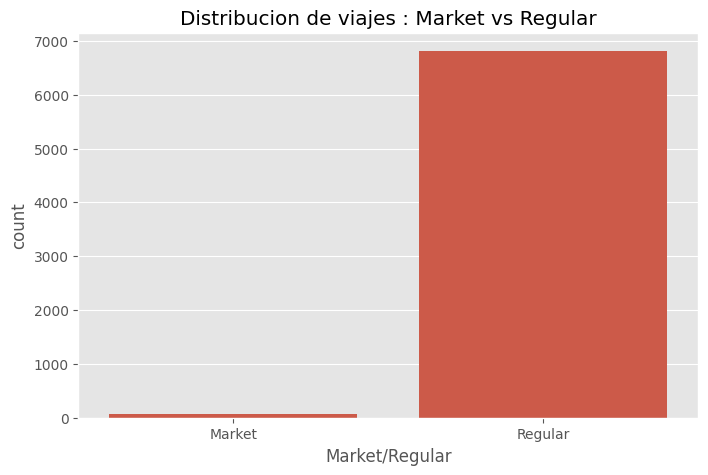

In [192]:
# Distribucion de viajes por tipo 
plt.figure(figsize=(8,5))
sns.countplot(x = 'Market/Regular', data = df)
plt.title('Distribucion de viajes : Market vs Regular')
plt.show()

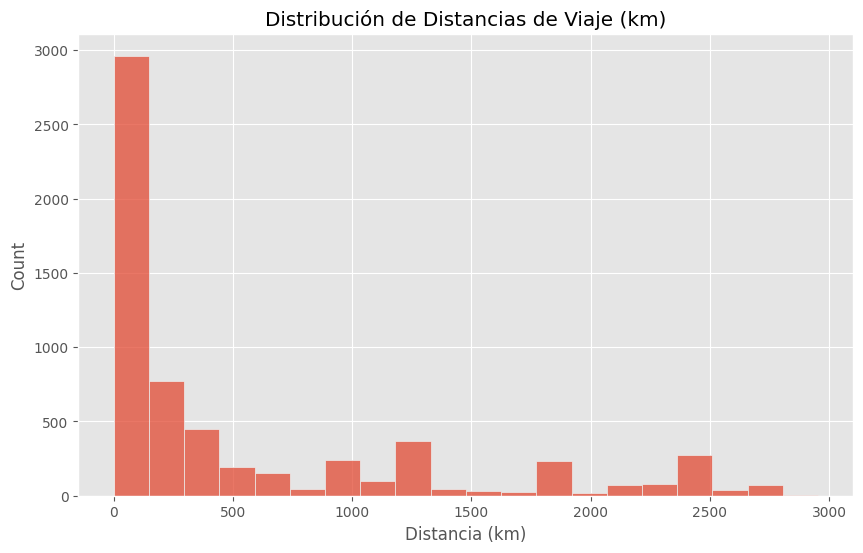

count    6168.000000
mean      553.856282
std       758.981836
min         0.000000
25%        40.000000
50%       160.000000
75%       900.000000
max      2954.700000
Name: TRANSPORTATION_DISTANCE_IN_KM, dtype: float64


In [193]:
# Distancias de viaje
# Distribucion de distancias
plt.figure(figsize=(10,6))
sns.histplot(df['TRANSPORTATION_DISTANCE_IN_KM'].dropna(), bins=20)
plt.title('Distribución de Distancias de Viaje (km)')
plt.xlabel('Distancia (km)')
plt.show()

# Estadísticas descriptivas
print(df['TRANSPORTATION_DISTANCE_IN_KM'].describe())

<AxesSubplot:ylabel='TRANSPORTATION_DISTANCE_IN_KM'>

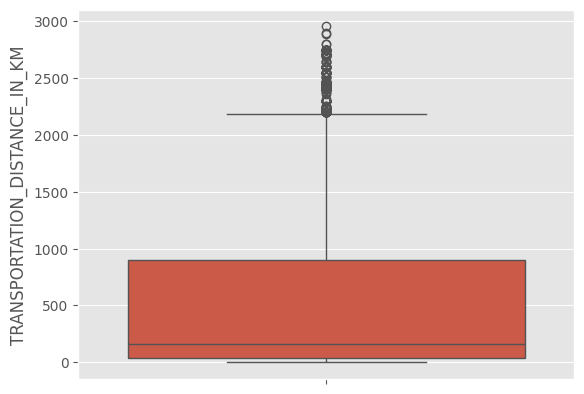

In [259]:
sns.boxplot(df['TRANSPORTATION_DISTANCE_IN_KM'])

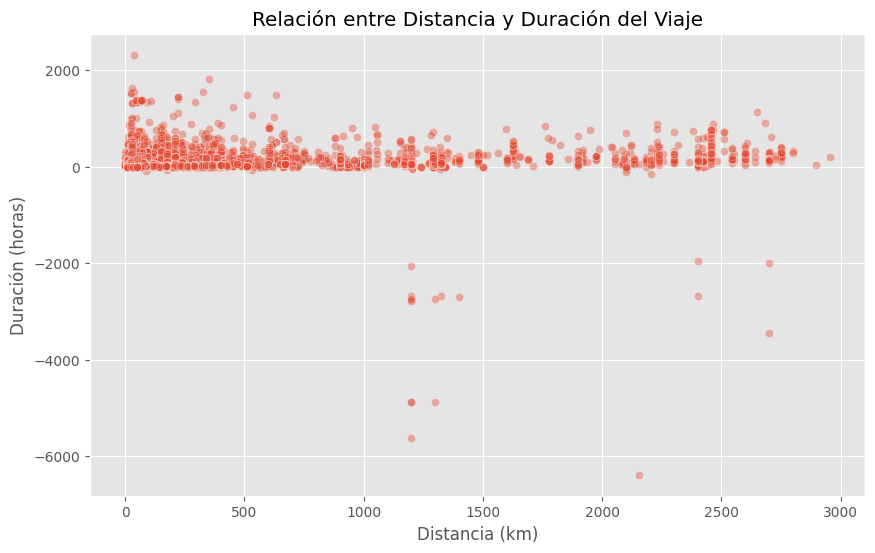

In [228]:
## Tiempos de viaje
df['trip_duration'] = (df['trip_end_date'] - df['trip_start_date']).dt.total_seconds()/3600

plt.figure(figsize=(10,6))
sns.scatterplot(x='TRANSPORTATION_DISTANCE_IN_KM', y='trip_duration', data=df, alpha = 0.4)
plt.title('Relación entre Distancia y Duración del Viaje')
plt.xlabel('Distancia (km)')
plt.ylabel('Duración (horas)')
#plt.ylim(0,1000)
plt.show()

In [246]:

viaje_con_espacio = df[df['Material Shipped'].str.contains('EMPTY', case=False, na=False)]

print(f"Número de viajes con espacio de carga identificados: {len(viaje_con_espacio)}")
print(f"Porcentaje del total: {len(viaje_con_espacio)/len(df)*100:.2f}%")

 
distancia_espacio = viaje_con_espacio['TRANSPORTATION_DISTANCE_IN_KM'].sum()
print(f"Distancia total de viajes vacíos: {distancia_espacio} km")


costoKm = 15  
ahorro = distancia_espacio * costoKm
print(f"Ahorro estimado: ₹{potential_savings:,.2f}")

Número de viajes con espacio de carga identificados: 515
Porcentaje del total: 7.49%
Distancia total de viajes vacíos: 345747.45 km
Ahorro estimado: ₹3,886,427.25


In [237]:
df[(df['delay'] == 'R') & (df['ontime'] == 'G')].shape[0]

24

Total de viajes: 6880
Viajes a tiempo (G): 2548 (37.03%)
Viajes con retraso (R): 4342 (63.11%)


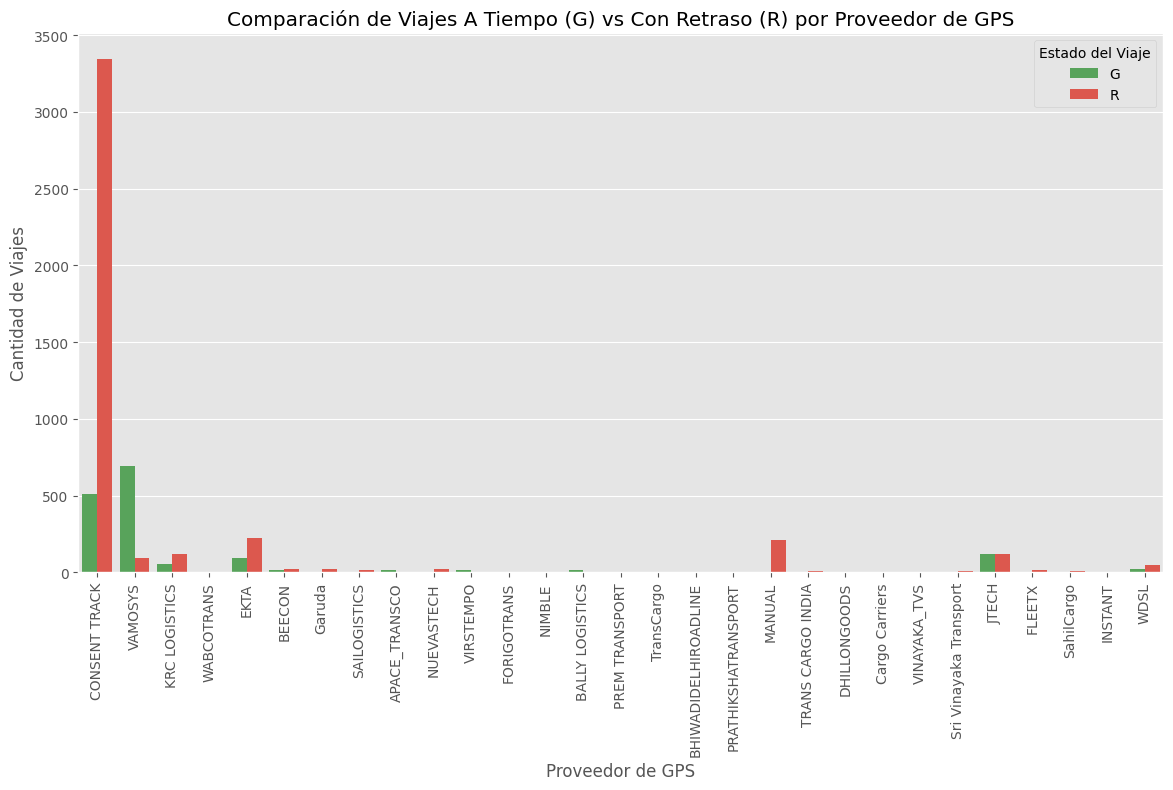

In [245]:
df['status'] = df.apply(lambda x: 'G' if x['ontime'] == 'G' else 'R' if x['delay'] == 'R' else 'No registrado', axis=1)

total_viajes = len(df)
viajes_a_tiempo = len(df[df['ontime'] == 'G'])
viajes_con_retraso = len(df[df['delay'] == 'R'])

print(f"Total de viajes: {total_viajes}")
print(f"Viajes a tiempo (G): {viajes_a_tiempo} ({viajes_a_tiempo/total_viajes*100:.2f}%)")
print(f"Viajes con retraso (R): {viajes_con_retraso} ({viajes_con_retraso/total_viajes*100:.2f}%)")

plt.figure(figsize=(14, 7))

sns.countplot(x='GpsProvider', hue='status', data=df[df['status'].isin(['G', 'R'])], 
              palette={'G': '#4CAF50', 'R': '#F44336'}, 
              hue_order=['G', 'R'])

plt.title('Comparación de Viajes A Tiempo (G) vs Con Retraso (R) por Proveedor de GPS')
plt.xlabel('Proveedor de GPS')
plt.ylabel('Cantidad de Viajes')
plt.legend(title='Estado del Viaje')

plt.xticks(rotation=90)

plt.show()

In [208]:
# Top 10 rutas más frecuentes
df.groupby(['Origin_Location', 'Destination_Location']).size().sort_values(ascending=False).head(10)


Origin_Location                                           Destination_Location                                    
DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,TAMIL NADU    340
Mugabala, Bangalore Rural, Karnataka                      Bangalore International Airport, Bangalore, Karnataka       183
Kollur, Medak, Telangana                                  Lakdaram, Medak, Telangana                                  169
Mugabala, Bangalore Rural, Karnataka                      Anekal, Bangalore, Karnataka                                151
Shive, Pune, Maharashtra                                  Pondur, Kanchipuram, Tamil Nadu                             136
Jamalpur, Gurgaon, Haryana                                Singaperumalkoil, Kanchipuram, Tamil Nadu                   132
Khorajnanoda, Ahmedabad, Gujarat                          Singaperumalkoil, Kanchipuram, Tamil Nadu                   107
Manali, Tiruvallur, Tamil Nadu 

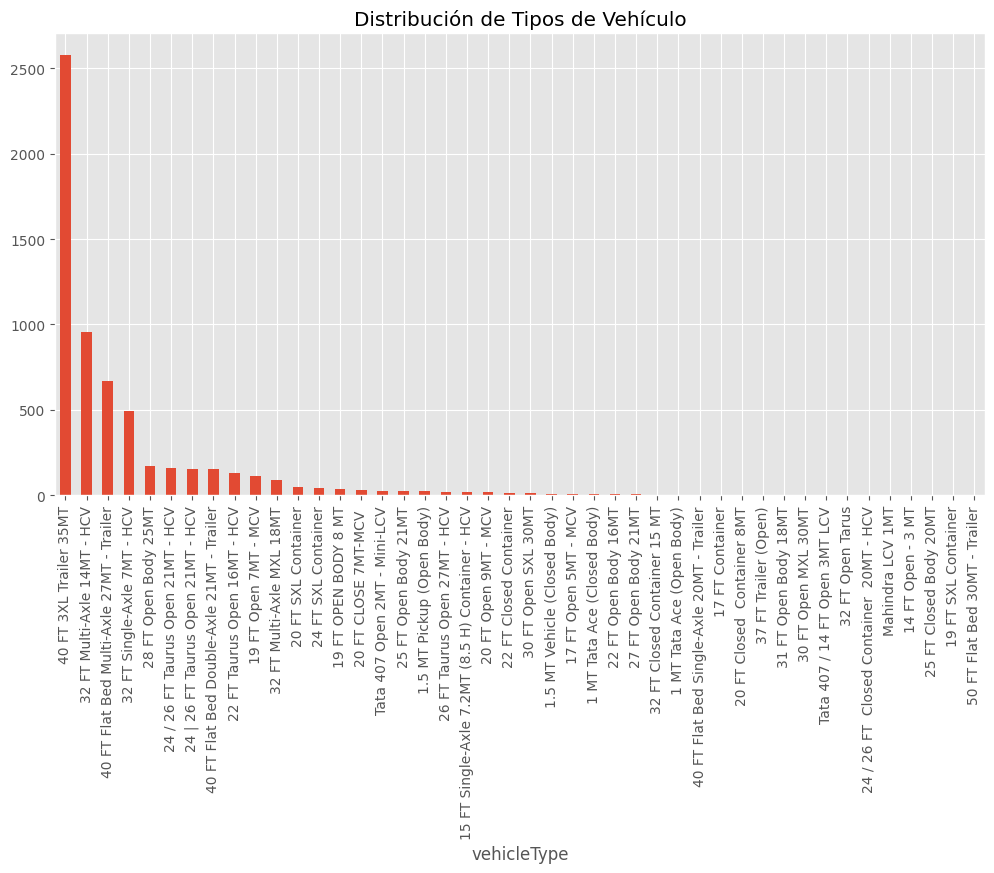

In [205]:
# Distribución de tipos de vehículo
plt.figure(figsize=(12,6))
df['vehicleType'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Vehículo')
plt.xticks(rotation=90)
plt.show()

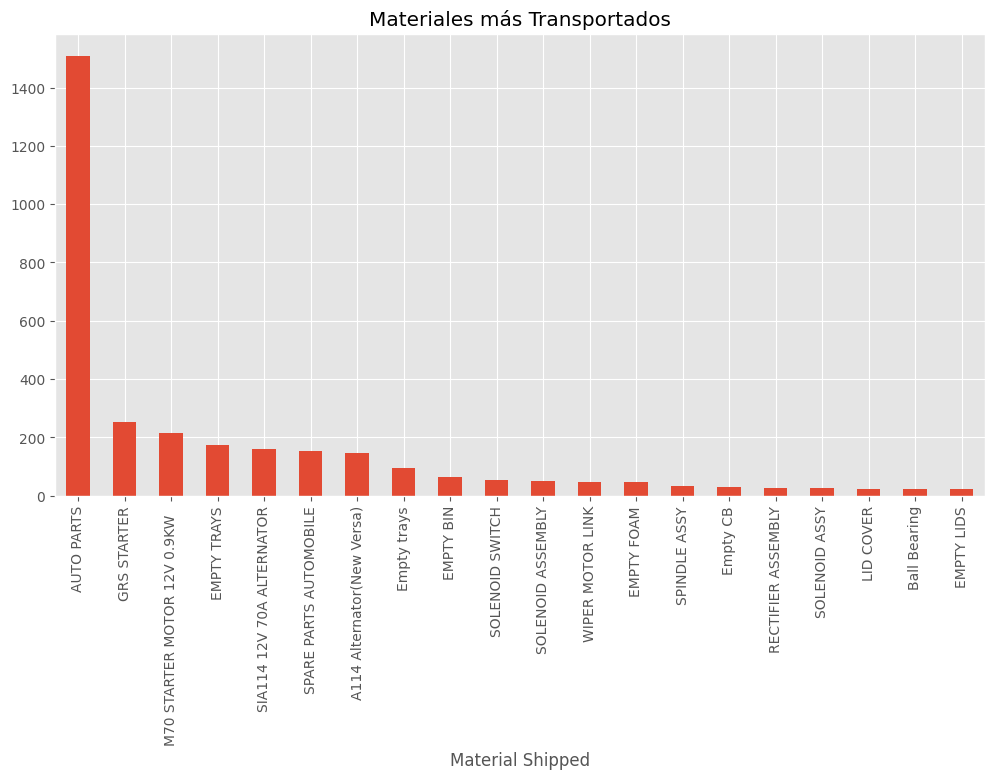

In [201]:
# Materiales más comunes
plt.figure(figsize=(12,6))
df['Material Shipped'].value_counts().head(20).plot(kind='bar')
plt.title('Materiales más Transportados')
plt.xticks(rotation=90)
plt.show()